[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL/blob/main/chapters/12B.ipynb)

*Author: Sanaz Vahdati, MD*

# **Section 12B: RNN, LSTM**



# **Recurrent Neural Network (RNN):**

A recurrent neural network (RNN) is a supervised machine learning model which is frequently used in sequential tasks such as time series predictions, autocorrection, radiology text report generation, and radiology imaging reconstruction [1,2]. The major difference between RNN and CNN is that RNN has “internal memory” to remember previously calculated information and generate output as a series from previous outputs in a sequence. In other words, RNN takes into account both the current input and the information it has learned from prior inputs when predicting an output in each node.


A single RNN architecture in a time series (t) consists of an input layer x = {xt-1, xt, xt+1}, a recurrent hidden layer h ={ ht-1, ht, ht+1}, and an output layer y= {yt-1, yt, yt+1}. These components are connected to each other with the weight matrix as shown in Figure 1. In this structure, the hidden layer works as the internal memory, and we can define it as : 


ht= ƒH(wIHxt +    wHHht-1 + bh )

The ht as the internal memory is the result of the hidden layer activation function ƒH(),  the wIH is the weight matrix connecting the input layer to the hidden layer, wHH is the weight from the hidden state, and bh is the bias. Subsequently, with the activation function in the output unit ƒO() and the bias vector bO, the output of the RNN can be described as:


yt= ƒO(wHOht + bO)

Since RNNs work through time, the above computation is repeated in each time step for each (new) data point[3].


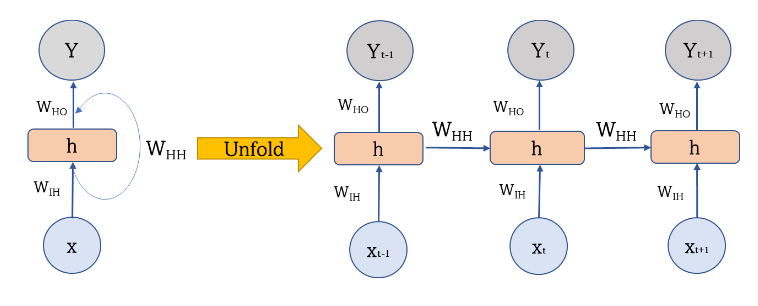

***Figure1.Recurrent neural network with its unfolded structure through time.***



# **Backpropagation Through Time(BPTT):**

As we described in earlier chapters, backpropagation matrices calculate the gradient of the loss according to the model’s weights and update the weights in a backward pass. As RNNs are networks through time, the backpropagation is expanded through time for RNN model training. Backpropagation through time can be described as an unfolded structure of the RNN depicting a backward pass in each specific time step which is dependent on the weight and error of the previous time step. The contribution of inputs that are in distant time steps to each other in a time series is prone to elimination and shrinkage. For example, the contribution of input(t) in time t vanishes as the neural network progresses through time t+1.


RNNs have many architectures, including one-to-one, one-to-many, many-to-one, and many-to-many. As shown in Figure 2, the RNN can receive input from one or many time points and predict the data based on one or many requested outputs. An example of a one-to-many structure is the image description generation from a single image input. Translating words from one language to another language is an instance of many-to-many architecture(4)



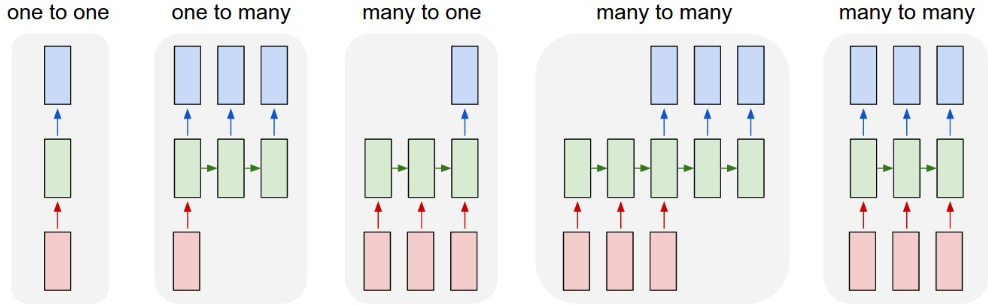

**Figure2. Different RNN architectures.**
<a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'>(source)</a>


Training RNN models is a challenging task and requires proper initialization and optimization to minimize the loss function and achieve favorable model performance.  RNNs are unable to process very long sequences, especially when the loss function is ReLU or tanh. In addition, although RNN models are powerful tools for sequential tasks, they suffer from two main obstacles: vanishing gradients and exploding gradients explained in <a href='https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL/blob/main/chapters/9A.ipynb#scrollTo=CaQFvtAkgR_d'>(chapter9)</a>. When the gradients become too high or too low, it hinders the model’s ability to learn during the training process. In addition, vanishing gradients decrease the memory and learning ability of neural networks for inputs that are far from each other in a sequence. Many attempts have been made to overcome these issues, including the gradient clipping technique in which a threshold for gradient descent is created to address gradient exploding phenomena.
Several variants of RNN models have recently been proposed, including Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU).




## **Long Short-Term Memory (LSTM):**

Long short-term memory (LSTM) structures were designed in the 1960s to tackle the vanishing gradient and exploding gradient problems described above. While RNNs have their internal memory in their hidden layer, LSTM structures can learn long-term sequential dependencies in the data using “memory cells.” The simple memory cell structure consists of an input gate, a forget gate, and an output gate. These gates manage the data transmission in hidden layers. Imagine these gates as doors that learn to open when they want to add information (input gate), discard some information from previous time steps (forget gate), and close to control the constant error flow (output gate) (5). The memory cell learns weights from arbitrary time intervals, and gates determine how to pass the information to the next memory cell in the flow (6). This architecture gives the network the ability to remember the information for a longer period of time.


Initially, the LSTM was designed with only input and output gates, and forget gates were adapted later for these structures. The forget gates can learn the weights in such a way that they can decide which information to keep or eliminate. The LSTM cell memory structure is shown in the figure below.


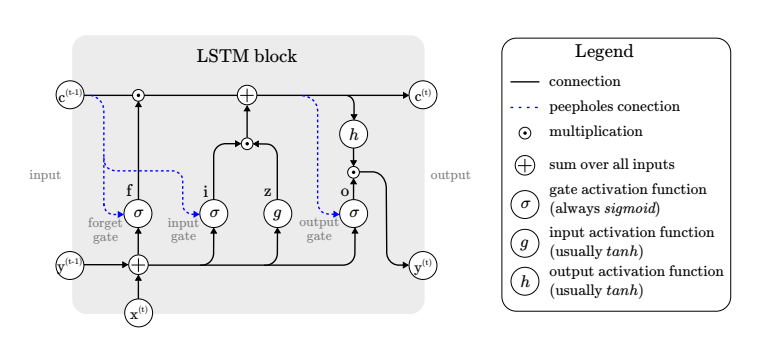

**Figure 2. LSTM block consists of an input gate, forget gate, and an output gate.**  <a href='https://link.springer.com/article/10.1007/s10462-020-09838-1'>(source)</a>


Each gate in time t receives the input(xt) for that time point, the output of the last iteration (yt-1), and the cell value of the last iteration (ct-1) as input and computes the output using the activation function. The peephole connections make it possible for each gate to leverage information from the cell value of the previous block. The “z” component demonstrated in the architecture is the “block input,” which processes the current input (xt) and the output of the last iteration (yt-1). The multiplication of the block input and input gate is summed up with the multiplication of the forget gate with the last cell’s state to compute the current cell’s value (ct). 
The output gate computation can be described as follows:

ot= σ(woxt + Royt-1 + poct + bo)



Where wo, Ro , po  are the weights with regard to its inputs, and the bo is the bias vector related to these weights. Finally, the cell output can be described as follows:
yt = g(ct)⊙ ot



LSTMs are widely used in natural language processing (such as medical image captioning) and in improving CNN performance for radiology image classification and generation. Although LSTMs address the gradient descent issue of RNNs, the memory cells lead to very high computational complexity in addition to memory constraints.


# **Gated Recurrent Unit (GRU):**
Gated recurrent units are another type of recurrent neural network. They are a modified version of LSTMs in which the three gates are combined into two gates: the “reset gate” and the “update gate.” This gives the GRU the ability to perform with fewer computational requirements. Another difference between GRUs and LSTMs is that GRUs keep the cell value of the last iteration of previous data points and decide which data to use. The update gate determines how much data from the previous time step must be selected to pass through the current time step.




**References:**

1. Qin, Chen, Jo Schlemper, Jose Caballero, Anthony N. Price, Joseph V. Hajnal, and Daniel Rueckert. "Convolutional recurrent neural networks for dynamic MR image reconstruction." IEEE transactions on medical imaging 38, no. 1 (2018): 280-290.
2. Banerjee, Imon, Yuan Ling, Matthew C. Chen, Sadid A. Hasan, Curtis P. Langlotz, Nathaniel Moradzadeh, Brian Chapman et al. "Comparative effectiveness of convolutional neural network (CNN) and recurrent neural network (RNN) architectures for radiology text report classification." Artificial intelligence in medicine 97 (2019): 79-88.
3. Salehinejad, Hojjat, Sharan Sankar, Joseph Barfett, Errol Colak, and Shahrokh Valaee. "Recent advances in recurrent neural networks." arXiv preprint arXiv:1801.01078 (2017).
4. https://builtin.com/data-science/recurrent-neural-networks-and-lstm
5. Hochreiter, Sepp, and Jürgen Schmidhuber. "Long short-term memory." Neural computation 9, no. 8 (1997): 1735-1780.
6. Van Houdt, Greg, Carlos Mosquera, and Gonzalo Nápoles. "A review on the long short-term memory model." Artificial Intelligence Review 53, no. 8 (2020): 5929-5955.